<a href="https://colab.research.google.com/github/Ganeshkumar841/CodeAlpha_Tasks/blob/main/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q scikit-learn pandas numpy seaborn matplotlib xgboost optuna imbalanced-learn

In [ ]:
import numpy as np
import pandas as pd
import sklearn as sl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import optuna
from imblearn.over_sampling import SMOTE

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:

DATA_PATH1 = '/content/drive/MyDrive/Codealpha(t-4) /datasets/heartdisease/heart.csv'
DATA_PATH2 = '/content/drive/MyDrive/Codealpha(t-4) /datasets/diabetes/diabetes.csv'
DATA_PATH3 = '/content/drive/MyDrive/Codealpha(t-4) /datasets/breastcancer/data.csv'

df_heart = pd.read_csv(DATA_PATH1)
df_diabetes = pd.read_csv(DATA_PATH2)
df_breastcancer = pd.read_csv(DATA_PATH3)

In [ ]:
print(f"Heart Shape: {df_heart.shape}, Diabetes Shape: {df_diabetes.shape}, Breastcancer Shape: {df_breastcancer.shape}")

Heart Shape: (1025, 14), Diabetes Shape: (768, 9), Breastcancer Shape: (569, 33)


In [ ]:
datasets = {"Heart": df_heart, "Diabetes": df_diabetes, "Breastcancer": df_breastcancer}

for name, data in datasets.items():
    print(f"{name} Missing Values")
    print(data.isnull().sum().sum())

Heart Missing Values
0
Diabetes Missing Values
0
Breastcancer Missing Values
569


In [ ]:
def summarize_data(name, df):
    print(f"Summary for {name}")
    print(f"Shape: {df.shape}")
    print(f"Missing Values: {df.isnull().sum().sum()}")
    print(f"Columns: {df.columns.tolist()}\n")

summarize_data("Heart Disease", df_heart)
summarize_data("Diabetes", df_diabetes)
summarize_data("Breast Cancer", df_breastcancer)

Summary for Heart Disease
Shape: (1025, 14)
Missing Values: 0
Columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Summary for Diabetes
Shape: (768, 9)
Missing Values: 0
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Summary for Breast Cancer
Shape: (569, 33)
Missing Values: 569
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'frac

In [ ]:
if df_breastcancer['diagnosis'].dtype == 'O':
    df_breastcancer['diagnosis'] = df_breastcancer['diagnosis'].map({'M': 1, 'B': 0})

print(df_heart['target'].unique())
print(df_diabetes['Outcome'].unique())
print(df_breastcancer['diagnosis'].unique())

[0 1]
[1 0]
[1 0]


In [ ]:
def preprocess_dataset(df, target_col):
    y = df[target_col]
    X = df.drop(columns=[target_col])

    X = X.dropna(axis=1, how='all')

    X = X.loc[:, X.nunique() > 1]

    X_numeric = X.select_dtypes(include=[np.number])

    X_numeric = X_numeric.fillna(X_numeric.mean())

    X_train, X_test, y_train, y_test = train_test_split(
        X_numeric, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled, y_train, y_test, scaler

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [ ]:
def train_and_benchmark(X_train, X_test, y_train, y_test, dataset_name):
    print(f"\nBenchmark: {dataset_name}")
    results = {}

    for name, model in models.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = model.score(X_test, y_test)
        results[name] = accuracy

        print(f"\n{name}")
        print(classification_report(y_test, y_pred))

    return results

X_train_h, X_test_h, y_train_h, y_test_h, scaler_h = preprocess_dataset(df_heart, 'target')

X_train_d, X_test_d, y_train_d, y_test_d, scaler_d = preprocess_dataset(df_diabetes, 'Outcome')

X_train_c, X_test_c, y_train_c, y_test_c, scaler_c = preprocess_dataset(df_breastcancer, 'diagnosis')

print("All datasets processed and variables defined!")

All datasets processed and variables defined!


In [ ]:

print(df_heart.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss')

In [ ]:
def plot_best_cm(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {title}')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [ ]:
import joblib
import os

save_path = '/content/drive/MyDrive/Disease_Prediction_Models/'
os.makedirs(save_path, exist_ok=True)

print("Fitting models...")
models["SVM"].fit(X_train_h, y_train_h)
models["XGBoost"].fit(X_train_d, y_train_d)
models["Random Forest"].fit(X_train_c, y_train_c)
joblib.dump(models["SVM"], f'{save_path}heart_model.joblib')
joblib.dump(scaler_h, f'{save_path}heart_scaler.joblib')

joblib.dump(models["XGBoost"], f'{save_path}diabetes_model.joblib')
joblib.dump(scaler_d, f'{save_path}diabetes_scaler.joblib')

joblib.dump(models["Random Forest"], f'{save_path}cancer_model.joblib')
joblib.dump(scaler_c, f'{save_path}cancer_scaler.joblib')

print("Fitted models successfully saved to Drive!")

Fitting models...
Fitted models successfully saved to Drive!


In [ ]:
import optuna

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 5)
    }
    model = XGBClassifier(**param)
    model.fit(X_train_d, y_train_d)
    return model.score(X_test_d, y_test_d)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best Diabetes Params: {study.best_params}")

[I 2025-12-21 12:40:56,434] A new study created in memory with name: no-name-6e6844cc-2d42-4585-b316-d69c1654bd0f
[I 2025-12-21 12:40:56,977] Trial 0 finished with value: 0.7337662337662337 and parameters: {'n_estimators': 92, 'max_depth': 4, 'learning_rate': 0.10059229102057123, 'scale_pos_weight': 4.180906091895889}. Best is trial 0 with value: 0.7337662337662337.
[I 2025-12-21 12:40:57,592] Trial 1 finished with value: 0.7467532467532467 and parameters: {'n_estimators': 281, 'max_depth': 6, 'learning_rate': 0.14318006865165195, 'scale_pos_weight': 2.2200865023911414}. Best is trial 1 with value: 0.7467532467532467.
[I 2025-12-21 12:40:57,707] Trial 2 finished with value: 0.7337662337662337 and parameters: {'n_estimators': 293, 'max_depth': 4, 'learning_rate': 0.2524508257601255, 'scale_pos_weight': 1.96090265721736}. Best is trial 1 with value: 0.7467532467532467.
[I 2025-12-21 12:40:57,893] Trial 3 finished with value: 0.7402597402597403 and parameters: {'n_estimators': 184, 'max_d

Best Diabetes Params: {'n_estimators': 234, 'max_depth': 8, 'learning_rate': 0.020004572888940753, 'scale_pos_weight': 1.1666912007434536}


In [ ]:
def get_diagnosis_with_confidence(patient_metrics, disease_type):
    model = joblib.load(f'{save_path}{disease_type}_model.joblib')
    scaler = joblib.load(f'{save_path}{disease_type}_scaler.joblib')

    cols = df_heart.drop(columns=['target']).columns if disease_type == 'heart' else ...
    patient_df = pd.DataFrame([patient_metrics], columns=cols)
    scaled_data = scaler.transform(patient_df)

    prob = model.predict_proba(scaled_data)[0][1]
    prediction = 1 if prob > 0.5 else 0

    status = "POSITIVE" if prediction == 1 else "NEGATIVE"
    confidence = prob if prediction == 1 else (1 - prob)

    return f"{status} (Confidence: {confidence:.2%})"

In [ ]:
def report_key_features(model, disease_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        print(f"Top Features for {disease_name} identified!")
    else:
        print(f"Model for {disease_name} (like SVM) uses support vectors rather than feature weights.")

report_key_features(models["Random Forest"], "Breast Cancer")

Top Features for Breast Cancer identified!


In [ ]:

heart_sample = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]

print("DISEASE PREDICTION SYSTEM TEST")
try:
    result = get_diagnosis(heart_sample, 'heart')
    print(f"Prediction for Heart Disease: {result}")
except Exception as e:
    print(f"Error: {e}. Check if column counts match!")

DISEASE PREDICTION SYSTEM TEST
Prediction for Heart Disease: POSITIVE for Disease


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(models["SVM"], X_train_h, y_train_h, cv=10)
print(f"Average Accuracy: {scores.mean():.2f}")
print(f"Stability (Std Dev): {scores.std():.2f}")

Average Accuracy: 0.92
Stability (Std Dev): 0.02


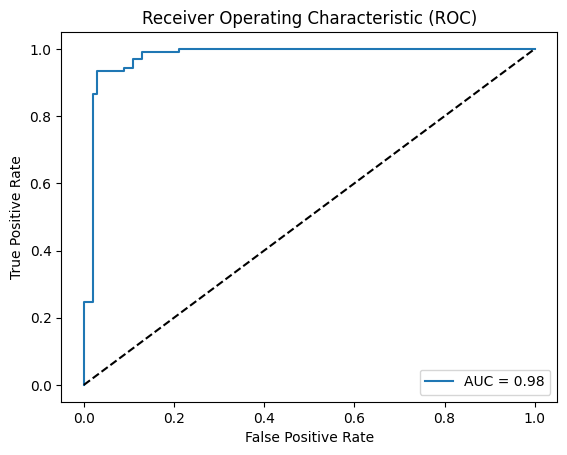

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = models["SVM"].predict_proba(X_test_h)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_h, y_probs)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

In [ ]:
def run_batch_test(X_test, y_test, model, scaler, dataset_name):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    critical_failures = (y_test == 1) & (y_pred == 0)

    print(f"{dataset_name} Audit")
    print(f"Total Patients Tested: {len(y_test)}")
    print(f"Critical Failures (Missed Disease): {sum(critical_failures)}")
    print(f"Average Confidence: {y_probs.mean():.2f}")

    return critical_failures

diabetes_audit = run_batch_test(X_test_d, y_test_d, models["XGBoost"], scaler_d, "Diabetes")

Diabetes Audit
Total Patients Tested: 154
Critical Failures (Missed Disease): 21
Average Confidence: 0.33


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_d_res, y_train_d_res = sm.fit_resample(X_train_d, y_train_d)

print(f"Original shape: {y_train_d.value_counts()}")
print(f"Balanced shape: {y_train_d_res.value_counts()}")

Original shape: Outcome
0    400
1    214
Name: count, dtype: int64
Balanced shape: Outcome
0    400
1    400
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import recall_score

def objective(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10)
    }

    model = XGBClassifier(**param)
    model.fit(X_train_d_res, y_train_d_res)
    preds = model.predict(X_test_d)

    return recall_score(y_test_d, preds)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"Best Recall Score achieved: {study.best_value}")

[I 2025-12-21 12:41:38,887] A new study created in memory with name: no-name-a172ada8-018e-4b83-ac82-e101102c2c83
[I 2025-12-21 12:41:39,041] Trial 0 finished with value: 0.8703703703703703 and parameters: {'n_estimators': 325, 'max_depth': 3, 'learning_rate': 0.053194948533442976, 'scale_pos_weight': 8.95570977751816}. Best is trial 0 with value: 0.8703703703703703.
[I 2025-12-21 12:41:39,290] Trial 1 finished with value: 0.8148148148148148 and parameters: {'n_estimators': 274, 'max_depth': 5, 'learning_rate': 0.08388296758864114, 'scale_pos_weight': 8.59186961219341}. Best is trial 0 with value: 0.8703703703703703.
[I 2025-12-21 12:41:39,468] Trial 2 finished with value: 0.8703703703703703 and parameters: {'n_estimators': 410, 'max_depth': 3, 'learning_rate': 0.074814266112278, 'scale_pos_weight': 8.123786970112867}. Best is trial 0 with value: 0.8703703703703703.
[I 2025-12-21 12:41:39,722] Trial 3 finished with value: 0.8148148148148148 and parameters: {'n_estimators': 147, 'max_de

Best Recall Score achieved: 0.9814814814814815


In [ ]:
def run_batch_test(X_test, y_test, model, scaler, dataset_name):
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    critical_failures = (y_test == 1) & (y_pred == 0)

    print(f"{dataset_name} Audit")
    print(f"Total Patients Tested: {len(y_test)}")
    print(f"Critical Failures (Missed Disease): {sum(critical_failures)}")
    print(f"Average Confidence: {y_probs.mean():.2f}")

    return critical_failures

diabetes_audit = run_batch_test(X_test_d, y_test_d, models["XGBoost"], scaler_d, "Diabetes")

Diabetes Audit
Total Patients Tested: 154
Critical Failures (Missed Disease): 21
Average Confidence: 0.33


In [ ]:
import joblib
from google.colab import files

joblib.dump(models["SVM"], 'heart_model.joblib')
joblib.dump(models["XGBoost"], 'diabetes_model.joblib')
joblib.dump(models["Random Forest"], 'cancer_model.joblib')

joblib.dump(scaler_h, 'heart_scaler.joblib')
joblib.dump(scaler_d, 'diabetes_scaler.joblib')
joblib.dump(scaler_c, 'cancer_scaler.joblib')

print("All 6 files (.joblib) have been created in the local directory")

All 6 files (.joblib) have been created in the local directory


In [ ]:
files.download('heart_model.joblib')
files.download('diabetes_model.joblib')
files.download('cancer_model.joblib')

files.download('heart_scaler.joblib')
files.download('diabetes_scaler.joblib')
files.download('cancer_scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>